In [ ]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')



## Titanic csv analysis

In [ ]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [ ]:
df.describe(include="all")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#no.of passenger survived mean=0.383838
#no.of male ,frequency=577
#minimum age is0.42000 max=80
#minimum fare=0.0000
#maximum fare=512.329200
#Most embarked from=southampton,644

In [ ]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

# cat_cols

In [ ]:
cat_cols=['survived','sex','embarked','pclass','sibsp','parch']
cat_cols

['survived', 'sex', 'embarked', 'pclass', 'sibsp', 'parch']

In [ ]:
for col in cat_cols:
    print(f"Unique values in {col}: {df[col].unique()}","\n")

Unique values in survived: [0 1] 

Unique values in sex: ['male' 'female'] 

Unique values in embarked: ['S' 'C' 'Q' nan] 

Unique values in pclass: [3 1 2] 

Unique values in sibsp: [1 0 3 4 2 5 8] 

Unique values in parch: [0 1 2 5 3 4 6] 



In [ ]:
for col in cat_cols:
 print(df[col].value_counts())
 print(df[col].value_counts(normalize=True))#display the value counts in percentage



survived
0    549
1    342
Name: count, dtype: int64
survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
sex
male      577
female    314
Name: count, dtype: int64
sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64
embarked
S    644
C    168
Q     77
Name: count, dtype: int64
embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64
pclass
3    491
1    216
2    184
Name: count, dtype: int64
pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64
sibsp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
sibsp
0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: proportion, dtype: float64
parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
parch
0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: proportion, dtype: 

In [ ]:
#embarked is a string value so we use to fill the missing values through mode.
df['embarked'].fillna(df.embarked.mode()[0],inplace=True)#fill the missing value in the embarked coloumn
df.isnull().sum().sort_values(ascending=False)#lets check the missing values in dataframe again

<ipython-input-158-2727140827>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df.embarked.mode()[0],inplace=True)#fill the missing value in the embarked coloumn


,0
deck,688
age,177
embark_town,2
sex,0
sibsp,0
pclass,0
survived,0
fare,0
parch,0
embarked,0


# method to fill missing value

In [ ]:
#if data is normally distributed or symmetrical then we fill missing values by mean of column
#if data is not normally distributed or skewed then we fill missing values by median.
#if data is categorical then we fill missing value through mode.

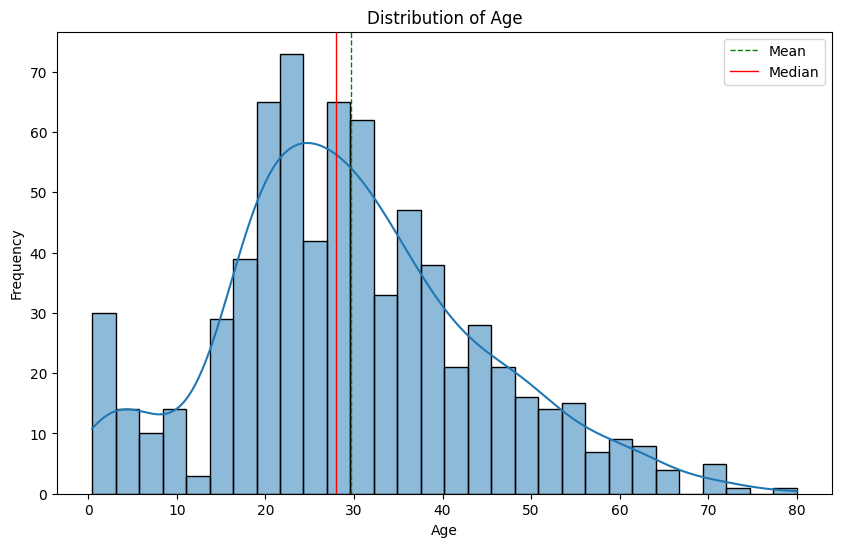

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axvline(df['age'].mean(), color='g', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df['age'].median(), color='r', linestyle='solid', linewidth=1, label='Median')
plt.legend()
plt.show()

In [ ]:
df.age.skew()

np.float64(0.38910778230082704)

In [ ]:
#0.38910 almost symmetrical so we can use mean to fill columns
"""
If this value is between:

-0.5 and 0.5, the distribution of the value is almost symmetrical
-1 and -0.5, the data is negatively skewed, and if it is between 0.5 to 1, the data is positively skewed. The skewness is moderate.
If the skewness is lower than -1 (negatively skewed) or greater than 1 (positively skewed), the data is highly skewed.
"""


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df['age'].fillna(df['age'].mean(),inplace=True)#fill the missing value in the age coloumn
df.isnull().sum().sort_values(ascending=False)#lets check the missing values in dataframe again

,0
deck,688
embarked,2
embark_town,2
age,0
survived,0
pclass,0
sex,0
fare,0
parch,0
sibsp,0


In [ ]:
df['deck'].fillna(df.deck.mode()[0],inplace=True)#fill the missing value in the deck("it is string value so we use mode") coloumn
df.isnull().sum().sort_values(ascending=False)#lets check the missing values in dataframe again

,0
embarked,2
pclass,0
survived,0
age,0
sibsp,0
parch,0
sex,0
fare,0
class,0
who,0


In [ ]:
df['embark_town'].fillna(df.embark_town.mode()[0],inplace=True)#fill the missing value in the embarked coloumn through mode
df.isnull().sum().sort_values(ascending=False)#lets check the missing values in dataframe again

,0
deck,688
embarked,2
survived,0
age,0
sibsp,0
pclass,0
sex,0
fare,0
parch,0
who,0


In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True


# **features engineering**

In [ ]:
#feature engineering
#feature is column
#engineering is creation
#with feature engineering we can add new feature or column.we can provide more information
#to the model, which can lead to better performance.
#e.g = with the help of weight and height column we can easily calculate BMI.

In [ ]:
#Feature engineering now we use in titanic dataset.
#sibling /spouse and parents/children
#sibsp-parch
#1.df['Familysize']=df['sibsp']+df['parch'] +1
#2. Name:
# We can extract the title from the Name column and create a new feature called Title.
#3. Fare:
# We can create a new feature called FarePerPerson by dividing the Fare by the FamilySize.
#4. Age:
# We can create a new feature called AgeGroup by categorizing the Age into different groups.
#5. GenderClass: If the Age is less than 18, then the GenderClass is 'Child', else it is as per the "Sex" column.

# familysize

In [ ]:
df['Familysize']=df['sibsp']+df['parch'] +1
df.head(10)#here we add column of familysize with  the help of (siblings+spouse+parents+children+man-himself)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Familysize
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,2
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,1
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,1
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,C,Queenstown,no,True,1
6,0,1,male,54.000000,0,0,51.8625,S,First,man,True,E,Southampton,no,True,1
7,0,3,male,2.000000,3,1,21.0750,S,Third,child,False,C,Southampton,no,False,5
8,1,3,female,27.000000,0,2,11.1333,S,Third,woman,False,C,Southampton,yes,False,3
9,1,2,female,14.000000,1,0,30.0708,C,Second,child,False,C,Cherbourg,yes,False,2


# solo

In [ ]:
#if we want to know who is travelling solo in the ship
df['solo']=df['Familysize'].apply(lambda x:1 if x==1 else ">1")
df.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Familysize,solo
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,2,>1
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2,>1
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,1,1
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2,>1
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,1,1
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,C,Queenstown,no,True,1,1
6,0,1,male,54.000000,0,0,51.8625,S,First,man,True,E,Southampton,no,True,1,1
7,0,3,male,2.000000,3,1,21.0750,S,Third,child,False,C,Southampton,no,False,5,>1
8,1,3,female,27.000000,0,2,11.1333,S,Third,woman,False,C,Southampton,yes,False,3,>1
9,1,2,female,14.000000,1,0,30.0708,C,Second,child,False,C,Cherbourg,yes,False,2,>1


# value_counts

In [ ]:
#df.solo.value_counts()
df.solo.value_counts(normalize=True)*100

,proportion
solo,
1,60.26936
>1,39.73064


In [ ]:
#df.solo
#df.solo.head(11)

In [ ]:
df.head()



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Familysize,solo
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,2,>1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2,>1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,1,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2,>1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,1,1


In [ ]:
 #Example list of names (replace with your actual name data)
# Make sure the number of names matches the number of rows in your Titanic DataFrame
names_list = ['Passenger 1 Name', 'Passenger 2 Name', 'Passenger 3 Name', 'Passenger 4 Name', 'Passenger 5 Name', ...]

# Add the 'Name' column to the DataFrame
if len(names_list) == len(df):
    df['Name'] = names_list
    print("\n'Name' column added from a list:")
    print(df.head())
else:
    print("\nError: The number of names in the list does not match the number of rows in the Titanic dataset.")



Error: The number of names in the list does not match the number of rows in the Titanic dataset.


# dt=dataframe use

In [ ]:
dt= pd.read_csv("https://raw.githubusercontent.com/ingledarshan/upGrad_Darshan/refs/heads/main/titanic.csv")
# Display the first few rows of the DataFrame
dt.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Title extraction from the Name column
print("Braund, Mr. Owen Harris".split(",")[1].split(".")[0].strip()) # Extract the title from the Name column
print("Futrelle, Mrs. Jacques Heath (Lily May Peel)".split(",")[1].split(".")[0].strip())  # Extract the title from the Name column

Mr
Mrs


# split the name

In [ ]:
"Ankit Dubey".split(" ")[0]

'Ankit'

In [ ]:
"Ankit Dubey".split(" ")[1]#("") there must be gap (" ")

'Dubey'

# Add Title

In [ ]:
dt['Title'] = dt['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())  # Extract the title from the Name column
dt.head()  # Display the first few rows of the DataFrame after creating the Title feature

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


# survival_counts

In [ ]:
dt.Survived.value_counts()

,count
Survived,
0,549
1,342


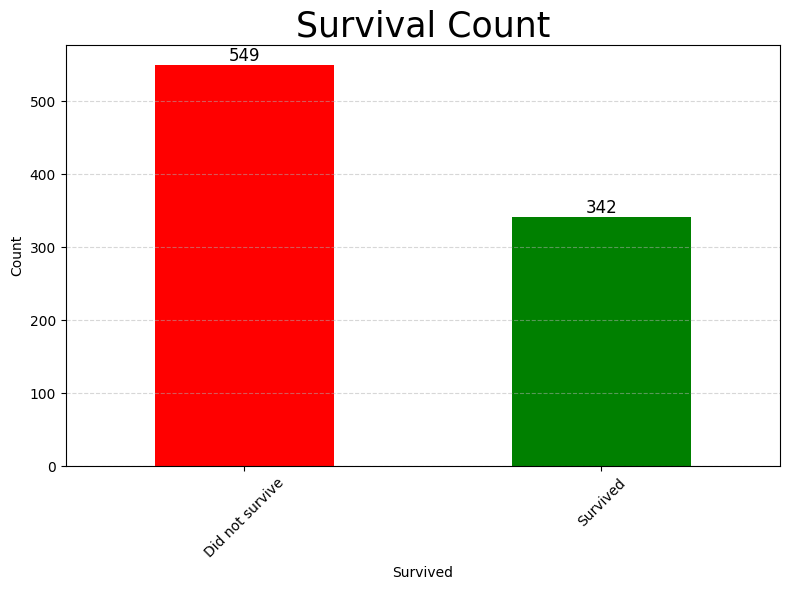

In [ ]:
dt["Survived"].value_counts().plot(kind='bar', figsize=(8, 6), color=['red', 'green'])
plt.title('Survival Count', size=25)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Did not survive', 'Survived'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add grid lines for better readability# Print text on the bars
for i, v in enumerate(dt["Survived"].value_counts()):
    plt.text(i, v , str(v), ha='center', va='bottom', fontsize=12, color='black')
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()  # Show the plot

In [ ]:
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


## using groupby

In [ ]:
dt.groupby('Pclass')['Survived'].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


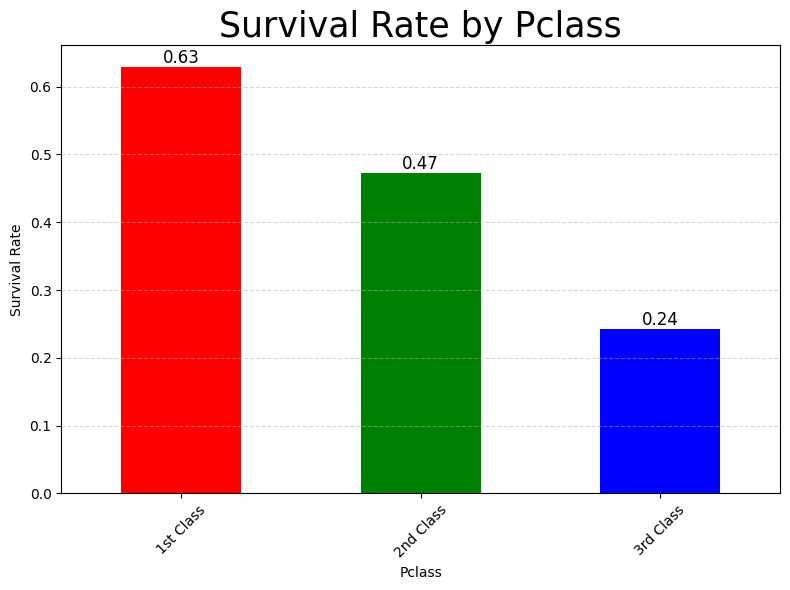

In [ ]:
dt.groupby('Pclass')['Survived'].mean().plot(kind='bar', figsize=(8, 6), color=['red', 'green', 'blue'])
plt.title('Survival Rate by Pclass', size=25)
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1, 2], labels=['1st Class', '2nd Class', '3rd Class'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add grid lines for better readability
# Print text on the bars
for i, v in enumerate(dt.groupby('Pclass')['Survived'].mean()):
    plt.text(i, v , f"{v:.2f}", ha='center', va='bottom', fontsize=12, color='black')
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()  # Show the plot

In [ ]:
dt.groupby('Sex')['Survived'].mean()

,Survived
Sex,
female,0.742038
male,0.188908


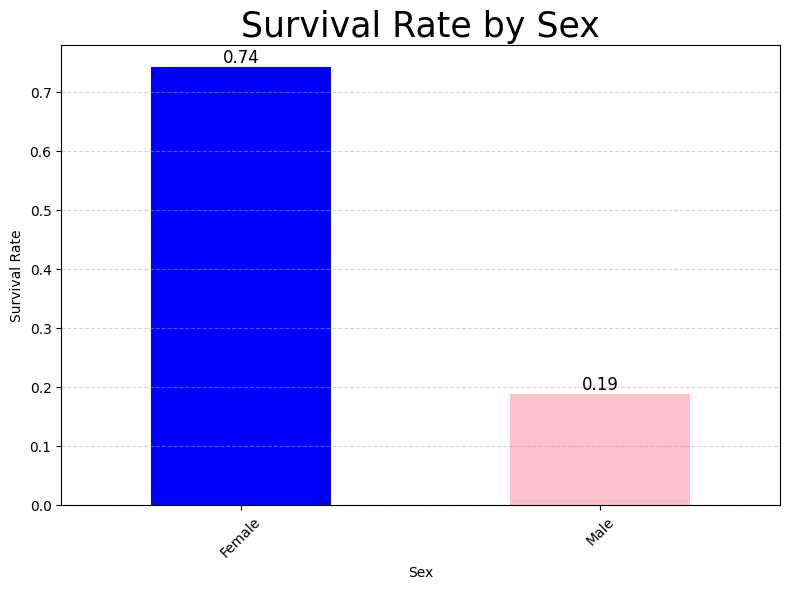

In [ ]:
# Survival rate by Sex
dt.groupby('Sex')['Survived'].mean().plot(kind='bar', figsize=(8, 6), color=['blue', 'pink'])
plt.title('Survival Rate by Sex', size=25)
plt.xlabel("Sex")
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1], labels=["Female", "Male"], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add grid lines for better readability
# Print text on the bars
for i, v in enumerate(dt.groupby("Sex")["Survived"].mean()):
    plt.text(i, v , f"{v:.2f}", ha='center', va='bottom', fontsize=12, color='black')
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()  # Show the plot

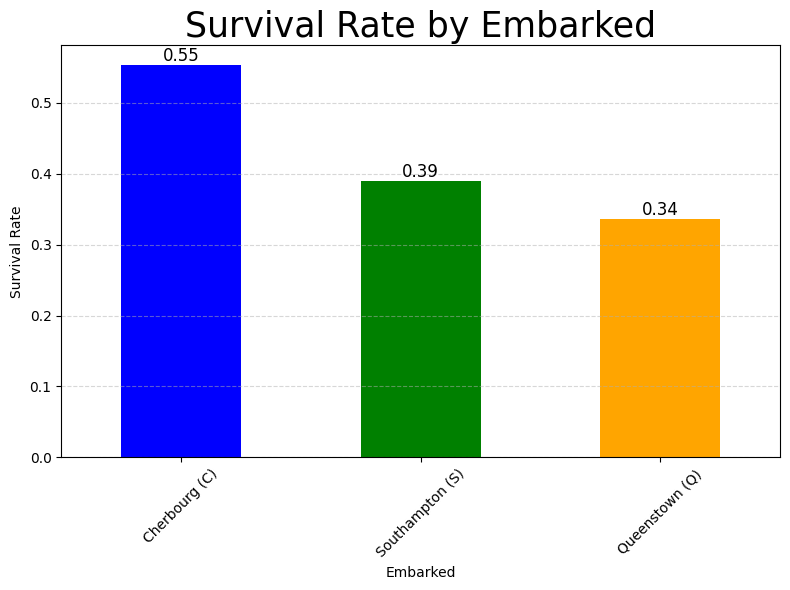

In [ ]:
# Survival rate by Embarked
dt.groupby('Embarked')['Survived'].mean().plot(kind='bar', figsize=(8, 6), color=['blue', 'green', 'orange'])
plt.title('Survival Rate by Embarked', size=25)
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1, 2], labels=['Cherbourg (C)', 'Southampton (S)', 'Queenstown (Q)'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add grid lines for better readability
# Print text on the bars
for i, v in enumerate(dt.groupby('Embarked')['Survived'].mean()):
    plt.text(i, v , f"{v:.2f}", ha='center', va='bottom', fontsize=12, color='black')
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()  # Show the plot

In [ ]:
dt.Title.value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


# Title mapping dictionary

In [ ]:
# Title mapping dictionary
title_mapping = {
    "Mr": "Mr",
    "Mrs": "Mrs",
    "Miss": "Miss",
    "Master": "Master",
    "Ms": "Miss",
    "Mlle": "Miss",
    "Lady": "Miss",
    "the Countess": "Miss",
    "Mme": "Mrs",
    "Dr": "Mr",
    "Rev": "Mr",
    "Col": "Mr",
    "Major": "Mr",
    "Capt": "Mr",
    "Sir": "Mr",
    "Don": "Mr",
    "Jonkheer": "Mr"
}

# Apply the mapping
dt["Title"] = dt["Title"].map(title_mapping)

# Display the value counts of the Title column after mapping
dt["Title"].value_counts()

# Insights from the above code:
# 1. The majority of passengers were titled as "Mr"
# 2. The second most common title is "Miss", followed by "Mrs".
# 3. The titles "Master", "Dr", "Rev", "Col", "Major", "Capt", "Sir", "Don", and "Jonkheer" are less common.

,count
Title,
Mr,538
Miss,187
Mrs,126
Master,40


In [ ]:
dt.groupby('Title')['Survived'].mean()

,Survived
Title,
Master,0.575000
Miss,0.705882
Mr,0.161710
Mrs,0.793651


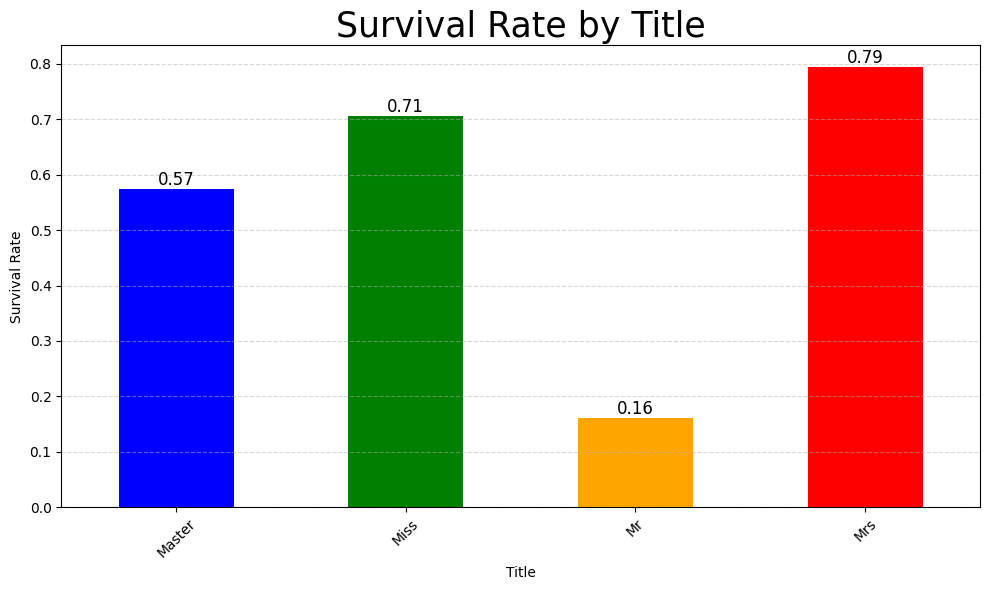

In [ ]:
# Survival rate by Title
dt.groupby('Title')['Survived'].mean().plot(kind='bar', figsize=(10, 6), color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title('Survival Rate by Title', size=25)
plt.xlabel('Title')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add grid lines for better readability
# Print text on the bars
for i, v in enumerate(dt.groupby('Title')['Survived'].mean()):
    plt.text(i, v , f"{v:.2f}", ha='center', va='bottom', fontsize=12, color='black')
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()  # Show the plot

# survival of gender class

# uses of lambda

In [ ]:
# GenderClass feature
dt["GenderClass"] = dt.apply(lambda x: "Child" if x["Age"] < 15 else x["Sex"],axis=1)
# Display the first few rows of the DataFrame after creating the GenderClass feature
dt.head()  # Display the first few rows of the DataFrame after

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,male


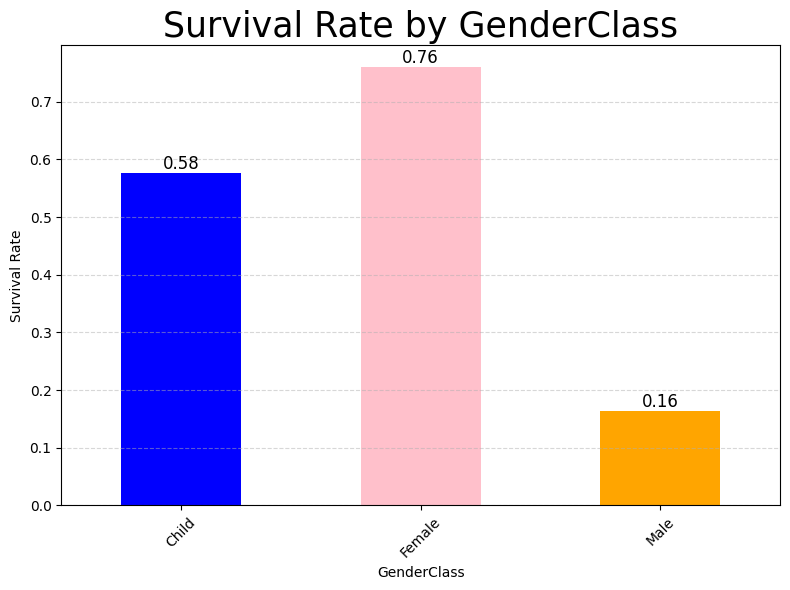

In [ ]:
# Survival rate by GenderClass
dt.groupby('GenderClass')['Survived'].mean().plot(kind='bar', figsize=(8, 6), color=['blue', 'pink', 'orange'])
plt.title('Survival Rate by GenderClass', size=25)
plt.xlabel('GenderClass')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1, 2], labels=['Child', 'Female', 'Male'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add grid lines for better readability
# Print text on the bars
for i, v in enumerate(dt.groupby('GenderClass')['Survived'].mean()):
    plt.text(i, v , f"{v:.2f}", ha='center', va='bottom', fontsize=12, color='black')
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()  # Show the plot

# import method

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")



# Files upload in colab

## HR employee attrition

EDA exploratory data analysis

In [ ]:
df=pd.read_csv('/home/HR-Employee-Attrition.csv')
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [ ]:
df.shape

(1470, 35)

In [ ]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


# sort values through isnull function

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


# **df**.**groupby**

In [ ]:
df.groupby('Age')['DailyRate'].describe().unstack()

# Print the result (optional)


Age
count  18        8.0
       19        9.0
       20       11.0
       21       13.0
       22       16.0
               ...  
max    56     1443.0
       57      593.0
       58     1272.0
       59     1435.0
       60     1499.0
Length: 344, dtype: float64

In [ ]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Now calculate the mean of the numeric 'Attrition' column
df.groupby('Age')['DailyRate'].mean()#.value_count(normalize=True),.describe(),.unstack()



,DailyRate
Age,
18,747.625000
19,548.444444
20,819.454545
21,762.846154
22,806.937500
23,707.928571
24,863.115385
25,768.076923
26,844.769231


In [ ]:
df.groupby('Age')['Attrition'].count()

,Attrition
Age,
18,0
19,0
20,0
21,0
22,0
23,0
24,0
25,0
26,0


In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,0.0,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,NaN,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [ ]:
cat_cols=['Attrition','BusinessTravel','Department','EducationField']
cat_cols

['Attrition', 'BusinessTravel', 'Department', 'EducationField']

In [ ]:
for col in cat_cols:
    print(f"Unique values in {col}: {df[col].unique()}","\n")

Unique values in Attrition: [nan] 

Unique values in BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] 

Unique values in Department: ['Sales' 'Research & Development' 'Human Resources'] 

Unique values in EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'] 



In [ ]:
for col in cat_cols:
 print(df[col].value_counts())
 print(df[col].value_counts(normalize=True))#display the value counts in percentage


Series([], Name: count, dtype: int64)
Series([], Name: proportion, dtype: float64)
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
BusinessTravel
Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: proportion, dtype: float64
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
Department
Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: proportion, dtype: float64
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
EducationField
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: prop

In [ ]:
.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,male


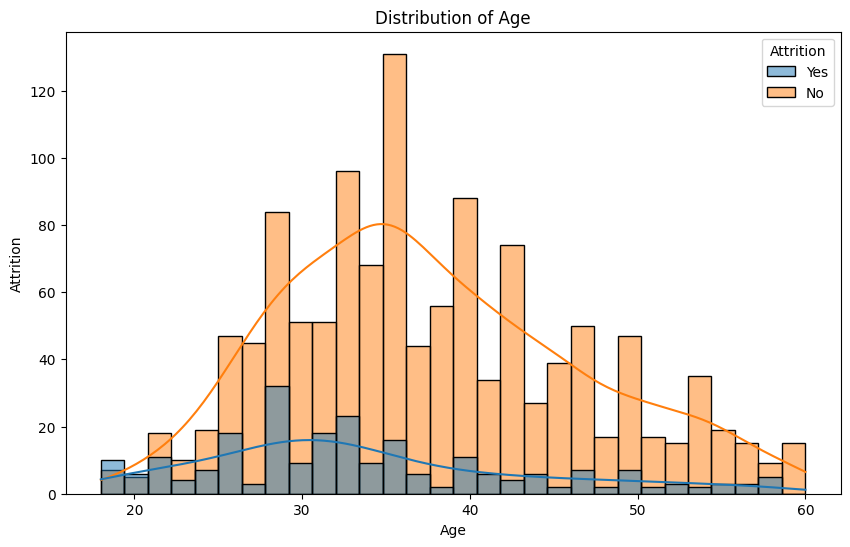

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df,x="Age", kde=True, bins=30,hue="Attrition")
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Attrition')
plt.show()

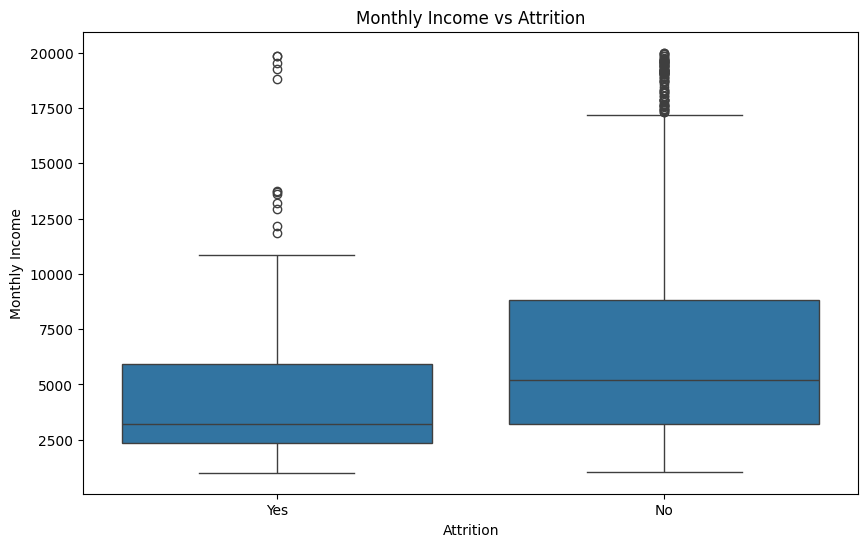

            count         mean          std     min     25%     50%     75%  \
Attrition                                                                     
No         1233.0  6832.739659  4818.208001  1051.0  3211.0  5204.0  8834.0   
Yes         237.0  4787.092827  3640.210367  1009.0  2373.0  3202.0  5916.0   

               max  
Attrition           
No         19999.0  
Yes        19859.0  


In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Attrition",y="MonthlyIncome",data=df)
plt.title("Monthly Income vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("Monthly Income")
plt.show()
print(df.groupby("Attrition")["MonthlyIncome"].describe())

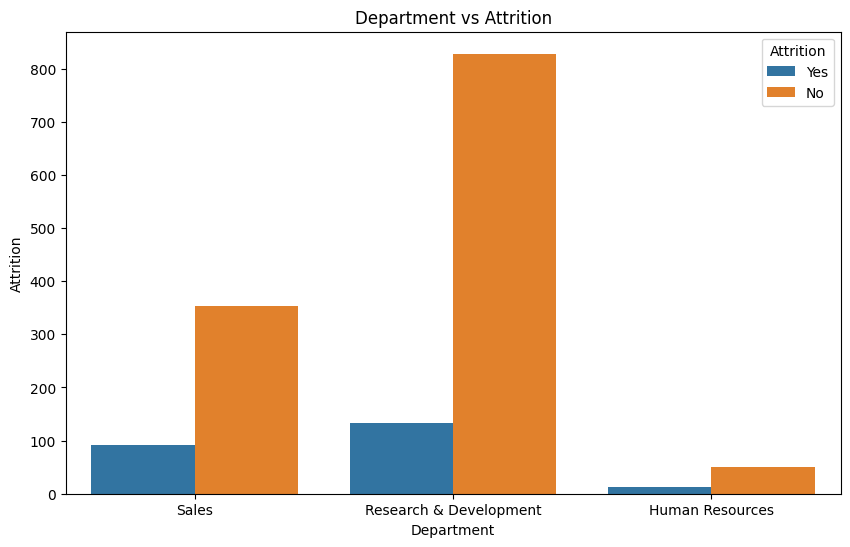

Attrition                     No       Yes
Department                                
Human Resources         0.809524  0.190476
Research & Development  0.861602  0.138398
Sales                   0.793722  0.206278


In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="Department",hue="Attrition",data=df)
sns.set(rc=('figure.figsize'(7,5)))
plt.title("Department vs Attrition")
plt.xlabel("Department")
plt.ylabel("Attrition")
plt.show()
dept_attrition=df.groupby("Department")["Attrition"].value_counts(normalize=True).unstack()
print(dept_attrition)
for bars in df.containers:
  plt.bar_label(bars,fmt='%.2f')


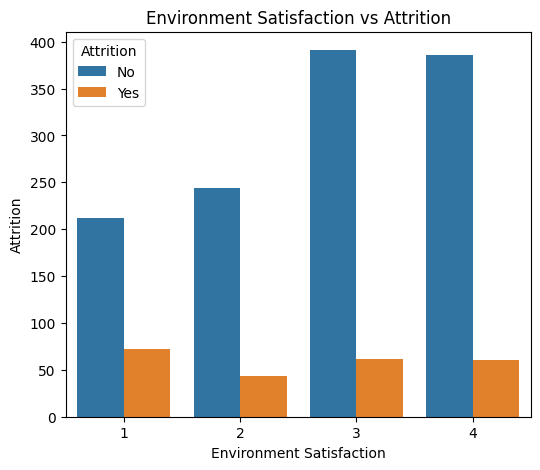

Attrition                       No        Yes
EnvironmentSatisfaction                      
1                        74.647887  25.352113
2                        85.017422  14.982578
3                        86.313466  13.686534
4                        86.547085  13.452915


In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x="EnvironmentSatisfaction",hue="Attrition",data=df)
plt.title("Environment Satisfaction vs Attrition")
plt.xlabel("Environment Satisfaction")
plt.ylabel("Attrition")
plt.show()
env_satisfaction=df.groupby("EnvironmentSatisfaction")["Attrition"].value_counts(normalize=True).unstack()*100
print(env_satisfaction)

In [ ]:
df.describe(include="all")

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


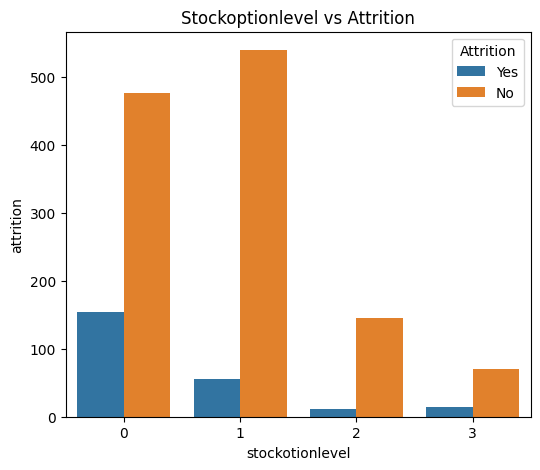

Attrition                No        Yes
StockOptionLevel                      
0                 75.594295  24.405705
1                 90.604027   9.395973
2                 92.405063   7.594937
3                 82.352941  17.647059


In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x="StockOptionLevel",hue="Attrition",data=df)#we cannot use kde=True in countplot.Only used in histplot)
plt.title("Stockoptionlevel vs Attrition")
plt.xlabel("stockotionlevel")
plt.ylabel("attrition")
plt.show()
stock_attrition=df.groupby("StockOptionLevel")['Attrition'].value_counts(normalize=True).unstack()*100
print(stock_attrition)

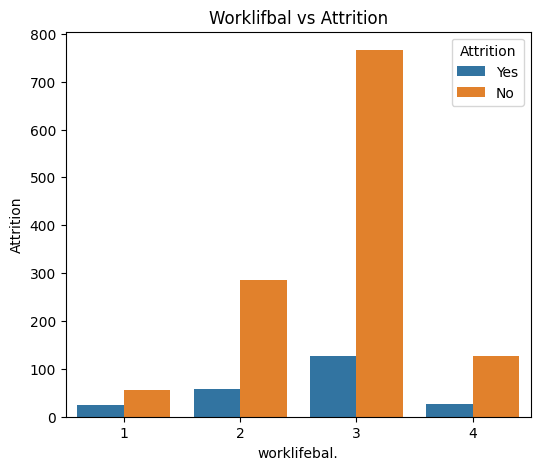

Attrition               No        Yes
WorkLifeBalance                      
1                68.750000  31.250000
2                83.139535  16.860465
3                85.778275  14.221725
4                82.352941  17.647059


In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x="WorkLifeBalance",hue="Attrition",data=df)
plt.title("Worklifbal vs Attrition")
plt.xlabel("worklifebal.")
plt.ylabel("Attrition")
plt.show()
worklife_attrition=df.groupby("WorkLifeBalance")['Attrition'].value_counts(normalize=True).unstack()*100
print(worklife_attrition)